In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Data Pre-processing

First dataset

In [4]:
final=pd.read_csv("train.csv")
final

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [5]:
final.drop(["RERA","BHK_OR_RK","LONGITUDE", "LATITUDE"], axis=1,inplace=True)
final

,POSTED_BY,UNDER_CONSTRUCTION,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,TARGET(PRICE_IN_LACS)
0,Owner,0,2,1300.236407,1,1,"Ksfc Layout,Bangalore",55.0
1,Dealer,0,2,1275.000000,1,1,"Vishweshwara Nagar,Mysore",51.0
2,Owner,0,2,933.159722,1,1,"Jigani,Bangalore",43.0
3,Owner,0,2,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",62.5
4,Dealer,1,2,999.009247,0,1,"New Town,Kolkata",60.5
...,...,...,...,...,...,...,...,...
29446,Owner,0,3,2500.000000,1,1,"Shamshabad Road,Agra",45.0
29447,Owner,0,2,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",16.0
29448,Dealer,0,2,1022.641509,1,1,"Ajmer Road,Jaipur",27.1
29449,Owner,0,2,927.079009,1,1,"Sholinganallur,Chennai",67.0


In [6]:
final.rename(columns = {'BHK_NO.':'No. of Bedrooms'}, inplace = True)
final.rename(columns = {'ADDRESS':'Location'}, inplace = True)
final.rename(columns = {'TARGET(PRICE_IN_LACS)':'TARGET PRICE'}, inplace = True)

In [7]:
final = final.applymap(str)

In [8]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   POSTED_BY           29451 non-null  object
 1   UNDER_CONSTRUCTION  29451 non-null  object
 2   No. of Bedrooms     29451 non-null  object
 3   SQUARE_FT           29451 non-null  object
 4   READY_TO_MOVE       29451 non-null  object
 5   RESALE              29451 non-null  object
 6   Location            29451 non-null  object
 7   TARGET PRICE        29451 non-null  object
dtypes: object(8)
memory usage: 1.8+ MB


In [9]:
final.replace("Whitefield,Bangalore", "Whitefield", inplace=True)
final

,POSTED_BY,UNDER_CONSTRUCTION,No. of Bedrooms,SQUARE_FT,READY_TO_MOVE,RESALE,Location,TARGET PRICE
0,Owner,0,2,1300.236407,1,1,"Ksfc Layout,Bangalore",55.0
1,Dealer,0,2,1275.0,1,1,"Vishweshwara Nagar,Mysore",51.0
2,Owner,0,2,933.1597222,1,1,"Jigani,Bangalore",43.0
3,Owner,0,2,929.9211427,1,1,"Sector-1 Vaishali,Ghaziabad",62.5
4,Dealer,1,2,999.009247,0,1,"New Town,Kolkata",60.5
...,...,...,...,...,...,...,...,...
29446,Owner,0,3,2500.0,1,1,"Shamshabad Road,Agra",45.0
29447,Owner,0,2,769.2307692,1,1,"E3-108, Lake View Recidency,,Vapi",16.0
29448,Dealer,0,2,1022.641509,1,1,"Ajmer Road,Jaipur",27.1
29449,Owner,0,2,927.0790093,1,1,"Sholinganallur,Chennai",67.0


In [10]:
print(final['Location'].value_counts()['Whitefield'])

230


Second dataset

In [11]:
bangalore=pd.read_csv("Bengaluru_House_Data.csv")
bangalore

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [12]:
bangalore['size'] = bangalore['size'].str.extract('(\d)', expand=True)
bangalore

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4,SollyCl,4689,4.0,1.0,488.00


In [13]:
bangalore.rename(columns = {'size':'No. of Bedrooms'}, inplace = True)
bangalore.rename(columns = {'location':'Location'}, inplace = True)

In [14]:
bangalore.drop(["bath"], axis=1,inplace=True)

In [15]:
bangalore["availability"] = np.where(bangalore["availability"] == "Ready To Move", 1, 0)

In [16]:
bangalore

,area_type,availability,Location,No. of Bedrooms,society,total_sqft,balcony,price
0,Super built-up Area,0,Electronic City Phase II,2,Coomee,1056,1.0,39.07
1,Plot Area,1,Chikka Tirupathi,4,Theanmp,2600,3.0,120.00
2,Built-up Area,1,Uttarahalli,3,NaN,1440,3.0,62.00
3,Super built-up Area,1,Lingadheeranahalli,3,Soiewre,1521,1.0,95.00
4,Super built-up Area,1,Kothanur,2,NaN,1200,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,1,Whitefield,5,ArsiaEx,3453,0.0,231.00
13316,Super built-up Area,1,Richards Town,4,NaN,3600,NaN,400.00
13317,Built-up Area,1,Raja Rajeshwari Nagar,2,Mahla T,1141,1.0,60.00
13318,Super built-up Area,0,Padmanabhanagar,4,SollyCl,4689,1.0,488.00


In [17]:
bangalore = bangalore.applymap(str)

In [18]:
bangalore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   area_type        13320 non-null  object
 1   availability     13320 non-null  object
 2   Location         13320 non-null  object
 3   No. of Bedrooms  13320 non-null  object
 4   society          13320 non-null  object
 5   total_sqft       13320 non-null  object
 6   balcony          13320 non-null  object
 7   price            13320 non-null  object
dtypes: object(8)
memory usage: 832.6+ KB


In [19]:
print(bangalore['Location'].value_counts()['Whitefield'])

540


# Data Integration

In [20]:
data=pd.merge(final,bangalore, how='outer')
data

,POSTED_BY,UNDER_CONSTRUCTION,No. of Bedrooms,SQUARE_FT,READY_TO_MOVE,RESALE,Location,TARGET PRICE,area_type,availability,society,total_sqft,balcony,price
0,Owner,0,2,1300.236407,1,1,"Ksfc Layout,Bangalore",55.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Dealer,0,2,1275.0,1,1,"Vishweshwara Nagar,Mysore",51.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Dealer,0,2,1363.109049,1,1,"Vishweshwara Nagar,Mysore",47.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Owner,0,2,933.1597222,1,1,"Jigani,Bangalore",43.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Owner,0,2,1147.342995,1,1,"Jigani,Bangalore",38.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84790,NaN,NaN,2,NaN,NaN,NaN,Abshot Layout,NaN,Built-up Area,1,Emtat H,1140,1.0,185.0
84791,NaN,NaN,7,NaN,NaN,NaN,Kundalahalli Colony,NaN,Plot Area,1,nan,1400,nan,218.0
84792,NaN,NaN,6,NaN,NaN,NaN,Vishwanatha Nagenahalli,NaN,Plot Area,1,nan,1200,nan,130.0
84793,NaN,NaN,2,NaN,NaN,NaN,Annaiah Reddy Layout,NaN,Super built-up Area,1,nan,1075,2.0,48.0


In [21]:
data = data.dropna()

In [22]:
data

,POSTED_BY,UNDER_CONSTRUCTION,No. of Bedrooms,SQUARE_FT,READY_TO_MOVE,RESALE,Location,TARGET PRICE,area_type,availability,society,total_sqft,balcony,price
5719,Dealer,0,2,1165.13904,1,1,Whitefield,75.0,Super built-up Area,1,DuenaTa,1170,1.0,38.0
5720,Dealer,0,2,1165.13904,1,1,Whitefield,75.0,Super built-up Area,0,Goted U,1459,1.0,94.82
5721,Dealer,0,2,1165.13904,1,1,Whitefield,75.0,Super built-up Area,1,Sonviik,1116,1.0,51.91
5722,Dealer,0,2,1165.13904,1,1,Whitefield,75.0,Built-up Area,1,Sancya,1225,2.0,47.6
5723,Dealer,0,2,1165.13904,1,1,Whitefield,75.0,Super built-up Area,1,nan,1075,1.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63952,Owner,0,1,650.026001,1,1,Whitefield,25.0,Super built-up Area,0,Oreldhi,524,1.0,29.0
63953,Owner,0,1,650.026001,1,1,Whitefield,25.0,Super built-up Area,0,Oreldhi,840,1.0,57.0
63954,Owner,0,1,650.026001,1,1,Whitefield,25.0,Super built-up Area,1,nan,516,1.0,39.0
63955,Owner,0,1,650.026001,1,1,Whitefield,25.0,Super built-up Area,0,Goted U,613,1.0,48.0


In [23]:
data.isnull().mean()

POSTED_BY             0.0
UNDER_CONSTRUCTION    0.0
No. of Bedrooms       0.0
SQUARE_FT             0.0
READY_TO_MOVE         0.0
RESALE                0.0
Location              0.0
TARGET PRICE          0.0
area_type             0.0
availability          0.0
society               0.0
total_sqft            0.0
balcony               0.0
price                 0.0
dtype: float64

In [24]:
Dup_Rows = data[data.duplicated()]
print("\n\nDuplicate Rows : \n {}".format(Dup_Rows)) 



Duplicate Rows : 
       POSTED_BY UNDER_CONSTRUCTION No. of Bedrooms    SQUARE_FT READY_TO_MOVE  \
5793     Dealer                  0               2   1165.13904             1   
5795     Dealer                  0               2   1165.13904             1   
5801     Dealer                  0               2   1165.13904             1   
5812     Dealer                  0               2   1165.13904             1   
5816     Dealer                  0               2   1165.13904             1   
...         ...                ...             ...          ...           ...   
49158    Dealer                  0               3  1643.475403             1   
49181    Dealer                  0               3  1643.475403             1   
49188    Dealer                  0               3  1643.475403             1   
49247    Dealer                  0               3  1643.475403             1   
49250    Dealer                  0               3  1643.475403             1   

      

In [25]:
data=data.drop_duplicates()
data

,POSTED_BY,UNDER_CONSTRUCTION,No. of Bedrooms,SQUARE_FT,READY_TO_MOVE,RESALE,Location,TARGET PRICE,area_type,availability,society,total_sqft,balcony,price
5719,Dealer,0,2,1165.13904,1,1,Whitefield,75.0,Super built-up Area,1,DuenaTa,1170,1.0,38.0
5720,Dealer,0,2,1165.13904,1,1,Whitefield,75.0,Super built-up Area,0,Goted U,1459,1.0,94.82
5721,Dealer,0,2,1165.13904,1,1,Whitefield,75.0,Super built-up Area,1,Sonviik,1116,1.0,51.91
5722,Dealer,0,2,1165.13904,1,1,Whitefield,75.0,Built-up Area,1,Sancya,1225,2.0,47.6
5723,Dealer,0,2,1165.13904,1,1,Whitefield,75.0,Super built-up Area,1,nan,1075,1.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63952,Owner,0,1,650.026001,1,1,Whitefield,25.0,Super built-up Area,0,Oreldhi,524,1.0,29.0
63953,Owner,0,1,650.026001,1,1,Whitefield,25.0,Super built-up Area,0,Oreldhi,840,1.0,57.0
63954,Owner,0,1,650.026001,1,1,Whitefield,25.0,Super built-up Area,1,nan,516,1.0,39.0
63955,Owner,0,1,650.026001,1,1,Whitefield,25.0,Super built-up Area,0,Goted U,613,1.0,48.0


In [26]:
Dup_Rows = data[data.duplicated()]

print("\n\nDuplicate Rows : \n {}".format(Dup_Rows)) 



Duplicate Rows : 
 Empty DataFrame
Columns: [POSTED_BY, UNDER_CONSTRUCTION, No. of Bedrooms, SQUARE_FT, READY_TO_MOVE, RESALE, Location, TARGET PRICE, area_type, availability, society, total_sqft, balcony, price]
Index: []


In [27]:
data = data.astype({'TARGET PRICE':'float', 'price':'float'})

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38662 entries, 5719 to 63956
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POSTED_BY           38662 non-null  object 
 1   UNDER_CONSTRUCTION  38662 non-null  object 
 2   No. of Bedrooms     38662 non-null  object 
 3   SQUARE_FT           38662 non-null  object 
 4   READY_TO_MOVE       38662 non-null  object 
 5   RESALE              38662 non-null  object 
 6   Location            38662 non-null  object 
 7   TARGET PRICE        38662 non-null  float64
 8   area_type           38662 non-null  object 
 9   availability        38662 non-null  object 
 10  society             38662 non-null  object 
 11  total_sqft          38662 non-null  object 
 12  balcony             38662 non-null  object 
 13  price               38662 non-null  float64
dtypes: float64(2), object(12)
memory usage: 4.4+ MB


In [29]:
data['PRICE'] = data[['TARGET PRICE','price']].mean(axis=1)
data

,POSTED_BY,UNDER_CONSTRUCTION,No. of Bedrooms,SQUARE_FT,READY_TO_MOVE,RESALE,Location,TARGET PRICE,area_type,availability,society,total_sqft,balcony,price,PRICE
5719,Dealer,0,2,1165.13904,1,1,Whitefield,75.0,Super built-up Area,1,DuenaTa,1170,1.0,38.00,56.500
5720,Dealer,0,2,1165.13904,1,1,Whitefield,75.0,Super built-up Area,0,Goted U,1459,1.0,94.82,84.910
5721,Dealer,0,2,1165.13904,1,1,Whitefield,75.0,Super built-up Area,1,Sonviik,1116,1.0,51.91,63.455
5722,Dealer,0,2,1165.13904,1,1,Whitefield,75.0,Built-up Area,1,Sancya,1225,2.0,47.60,61.300
5723,Dealer,0,2,1165.13904,1,1,Whitefield,75.0,Super built-up Area,1,nan,1075,1.0,53.00,64.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63952,Owner,0,1,650.026001,1,1,Whitefield,25.0,Super built-up Area,0,Oreldhi,524,1.0,29.00,27.000
63953,Owner,0,1,650.026001,1,1,Whitefield,25.0,Super built-up Area,0,Oreldhi,840,1.0,57.00,41.000
63954,Owner,0,1,650.026001,1,1,Whitefield,25.0,Super built-up Area,1,nan,516,1.0,39.00,32.000
63955,Owner,0,1,650.026001,1,1,Whitefield,25.0,Super built-up Area,0,Goted U,613,1.0,48.00,36.500


In [30]:
data.drop(["TARGET PRICE", "price", "Location", "society"], axis=1,inplace=True)
data

,POSTED_BY,UNDER_CONSTRUCTION,No. of Bedrooms,SQUARE_FT,READY_TO_MOVE,RESALE,area_type,availability,total_sqft,balcony,PRICE
5719,Dealer,0,2,1165.13904,1,1,Super built-up Area,1,1170,1.0,56.500
5720,Dealer,0,2,1165.13904,1,1,Super built-up Area,0,1459,1.0,84.910
5721,Dealer,0,2,1165.13904,1,1,Super built-up Area,1,1116,1.0,63.455
5722,Dealer,0,2,1165.13904,1,1,Built-up Area,1,1225,2.0,61.300
5723,Dealer,0,2,1165.13904,1,1,Super built-up Area,1,1075,1.0,64.000
...,...,...,...,...,...,...,...,...,...,...,...
63952,Owner,0,1,650.026001,1,1,Super built-up Area,0,524,1.0,27.000
63953,Owner,0,1,650.026001,1,1,Super built-up Area,0,840,1.0,41.000
63954,Owner,0,1,650.026001,1,1,Super built-up Area,1,516,1.0,32.000
63955,Owner,0,1,650.026001,1,1,Super built-up Area,0,613,1.0,36.500


In [31]:
print(data['POSTED_BY'].value_counts())
print(data['UNDER_CONSTRUCTION'].value_counts())
print(data['No. of Bedrooms'].value_counts())
print(data['SQUARE_FT'].value_counts())
print(data['READY_TO_MOVE'].value_counts())
print(data['RESALE'].value_counts())
print(data['area_type'].value_counts())
print(data['availability'].value_counts())
print(data['total_sqft'].value_counts())
print(data['balcony'].value_counts())

Dealer     24558
Owner      13553
Builder      551
Name: POSTED_BY, dtype: int64
0    35380
1     3282
Name: UNDER_CONSTRUCTION, dtype: int64
3    18984
2    17200
4     2400
1       78
Name: No. of Bedrooms, dtype: int64
1216.075931    430
1216.051885    430
1150.086256    383
1346.181097    215
1170.00117     215
              ... 
3262.004175     96
3640.28583      96
463.0021142     26
751.0729614     26
650.026001      26
Name: SQUARE_FT, Length: 218, dtype: int64
1    35380
0     3282
Name: READY_TO_MOVE, dtype: int64
1    37272
0     1390
Name: RESALE, dtype: int64
Super built-up  Area    28810
Built-up  Area           5984
Plot  Area               3868
Name: area_type, dtype: int64
1    23968
0    14694
Name: availability, dtype: int64
1200    1610
1216    1280
1500     816
1655     678
1140     560
        ... 
613        3
516        3
650        3
605        3
530        3
Name: total_sqft, Length: 297, dtype: int64
2.0    15970
1.0    14491
3.0     5229
nan     1714
0.0    

In [32]:
data['UNDER_CONSTRUCTION'] = pd.to_numeric(data['UNDER_CONSTRUCTION'] , errors='coerce')
data['No. of Bedrooms'] = pd.to_numeric(data['No. of Bedrooms'] , errors='coerce')
data['SQUARE_FT'] = pd.to_numeric(data['SQUARE_FT'] , errors='coerce')
data['READY_TO_MOVE'] = pd.to_numeric(data['READY_TO_MOVE']  , errors='coerce')
data['RESALE'] = pd.to_numeric(data['RESALE']  , errors='coerce')
data['availability'] = pd.to_numeric(data['availability'] , errors='coerce')
data['total_sqft'] = pd.to_numeric(data['total_sqft'] , errors='coerce')
data['balcony'] = pd.to_numeric(data['balcony'] , errors='coerce')

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38662 entries, 5719 to 63956
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POSTED_BY           38662 non-null  object 
 1   UNDER_CONSTRUCTION  38662 non-null  int64  
 2   No. of Bedrooms     38662 non-null  int64  
 3   SQUARE_FT           38662 non-null  float64
 4   READY_TO_MOVE       38662 non-null  int64  
 5   RESALE              38662 non-null  int64  
 6   area_type           38662 non-null  object 
 7   availability        38662 non-null  int64  
 8   total_sqft          37719 non-null  float64
 9   balcony             36948 non-null  float64
 10  PRICE               38662 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 3.5+ MB


This completes the Data cleaning, transformation and integration process.

# Feature Engineering

In [34]:
from sklearn.model_selection import train_test_split

X = data.drop(['PRICE'], axis=1)
y = data['PRICE']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
train_data = X_train.join(y_train)

In [37]:
train_data

,POSTED_BY,UNDER_CONSTRUCTION,No. of Bedrooms,SQUARE_FT,READY_TO_MOVE,RESALE,area_type,availability,total_sqft,balcony,PRICE
16450,Owner,0,2,1215.066829,1,1,Built-up Area,0,1447.0,1.0,76.500
15825,Owner,0,2,1216.075931,1,1,Super built-up Area,1,1255.0,3.0,79.500
29568,Dealer,0,3,2060.641743,1,1,Super built-up Area,1,1452.0,2.0,93.145
33283,Dealer,0,3,1775.147929,1,1,Built-up Area,1,1896.0,1.0,112.500
13799,Dealer,0,2,1240.694789,1,1,Super built-up Area,0,1216.0,1.0,86.250
...,...,...,...,...,...,...,...,...,...,...,...
11879,Owner,0,2,1244.864932,1,1,Super built-up Area,1,1301.0,2.0,82.500
17389,Dealer,0,2,1216.175129,1,1,Super built-up Area,1,1140.0,2.0,60.500
36027,Dealer,0,3,1500.000000,1,1,Super built-up Area,1,1760.0,2.0,99.500
7363,Dealer,0,2,1216.102880,1,1,Built-up Area,0,1447.0,1.0,85.000


array([[<AxesSubplot:title={'center':'UNDER_CONSTRUCTION'}>,
        <AxesSubplot:title={'center':'No. of Bedrooms'}>,
        <AxesSubplot:title={'center':'SQUARE_FT'}>],
       [<AxesSubplot:title={'center':'READY_TO_MOVE'}>,
        <AxesSubplot:title={'center':'RESALE'}>,
        <AxesSubplot:title={'center':'availability'}>],
       [<AxesSubplot:title={'center':'total_sqft'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'PRICE'}>]], dtype=object)

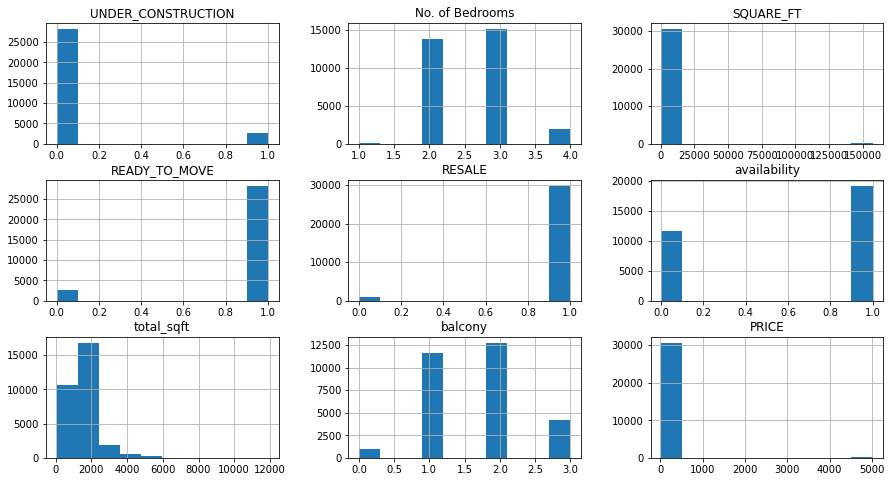

In [38]:
train_data.hist(figsize=(15,8))

<AxesSubplot:>

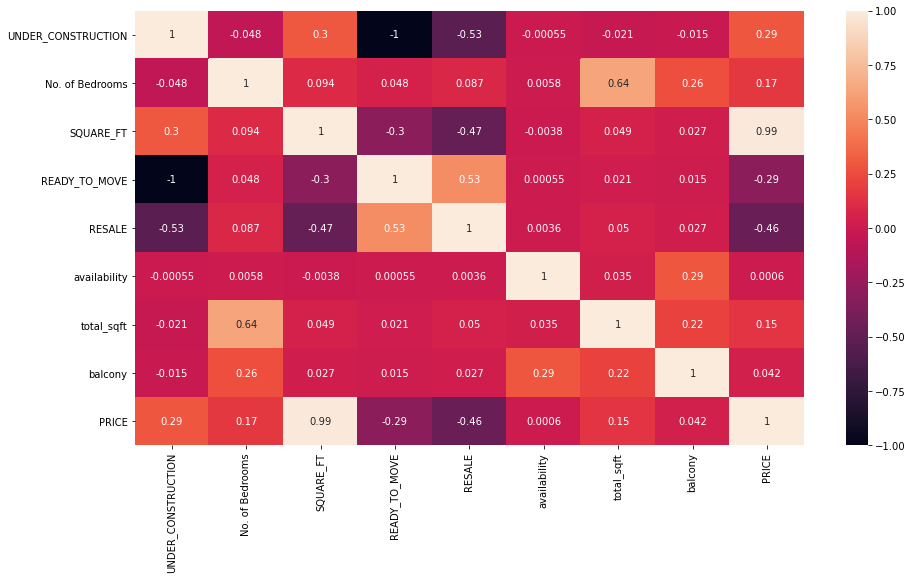

In [39]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True)

<AxesSubplot:>

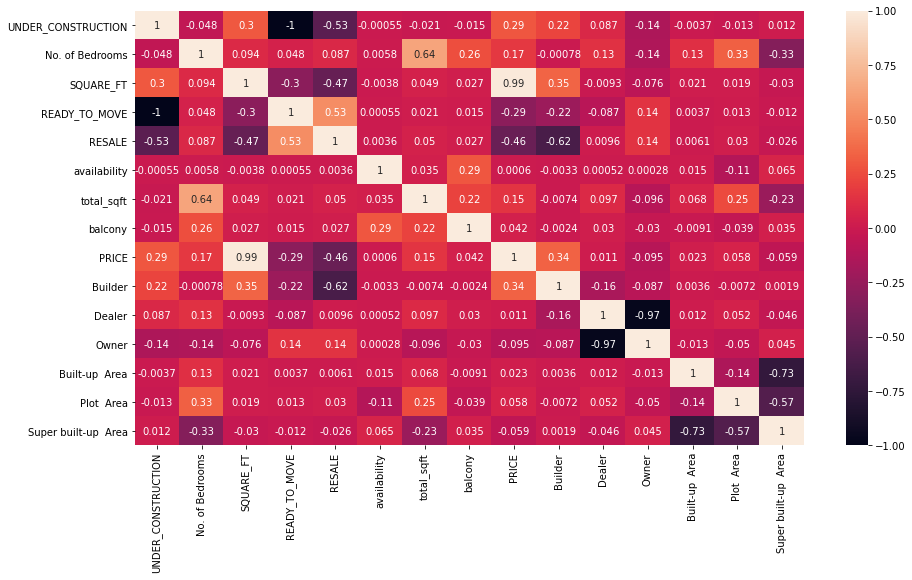

In [40]:
train_data = train_data.join(pd.get_dummies(train_data.POSTED_BY)).drop(['POSTED_BY'], axis = 1)
train_data = train_data.join(pd.get_dummies(train_data.area_type)).drop(['area_type'], axis = 1)
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True)

<AxesSubplot:>

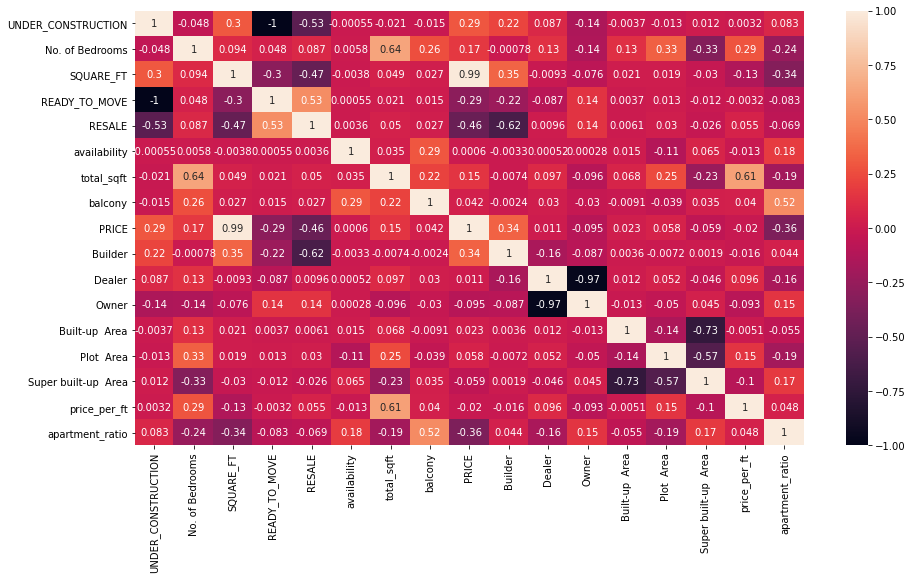

In [41]:
train_data['price_per_ft'] = train_data['PRICE'] / train_data['SQUARE_FT']
train_data['apartment_ratio'] = (train_data['No. of Bedrooms'] + train_data['balcony']) / train_data['SQUARE_FT'] 
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True)

<AxesSubplot:xlabel='price_per_ft', ylabel='apartment_ratio'>

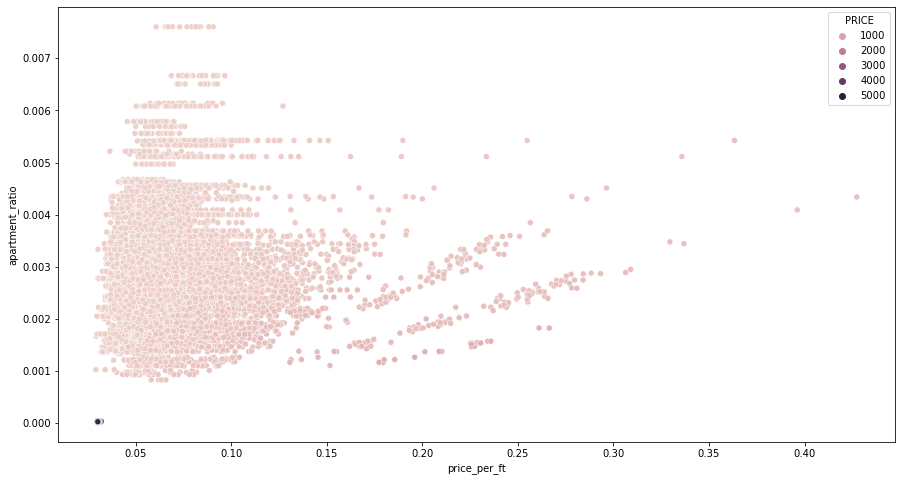

In [42]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="price_per_ft", y = "apartment_ratio", data = train_data, hue = "PRICE")

In [43]:
train_data = train_data.dropna()
train_data=train_data.drop_duplicates()

In [44]:
train_data.isnull().mean()

UNDER_CONSTRUCTION      0.0
No. of Bedrooms         0.0
SQUARE_FT               0.0
READY_TO_MOVE           0.0
RESALE                  0.0
availability            0.0
total_sqft              0.0
balcony                 0.0
PRICE                   0.0
Builder                 0.0
Dealer                  0.0
Owner                   0.0
Built-up  Area          0.0
Plot  Area              0.0
Super built-up  Area    0.0
price_per_ft            0.0
apartment_ratio         0.0
dtype: float64

In [45]:
from sklearn.linear_model import LinearRegression
X_train, y_train = train_data.drop(['PRICE'], axis = 1), train_data['PRICE']

In [46]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [47]:
test_data = X_test.join(y_test)

test_data = test_data.join(pd.get_dummies(test_data.POSTED_BY)).drop(['POSTED_BY'], axis = 1)
test_data = test_data.join(pd.get_dummies(test_data.area_type)).drop(['area_type'], axis = 1)

test_data['price_per_ft'] = test_data['PRICE'] / test_data['SQUARE_FT']
test_data['apartment_ratio'] = (test_data['No. of Bedrooms'] + test_data['balcony']) / test_data['SQUARE_FT'] 

test_data = test_data.dropna()
test_data = test_data.drop_duplicates()

In [48]:
X_test, y_test = test_data.drop(['PRICE'], axis = 1), test_data['PRICE']

In [49]:
reg.score(X_test, y_test)

0.9988903067690862

In [50]:
from sklearn import linear_model

In [51]:
X_sqft = test_data['SQUARE_FT'].values.reshape(-1,1)
y_Price = test_data['PRICE'].values

In [52]:
ols = linear_model.LinearRegression()
model = ols.fit(X_sqft, y_Price)
response = model.predict(X_sqft)

In [53]:
r2 = model.score(X_sqft, y_Price)

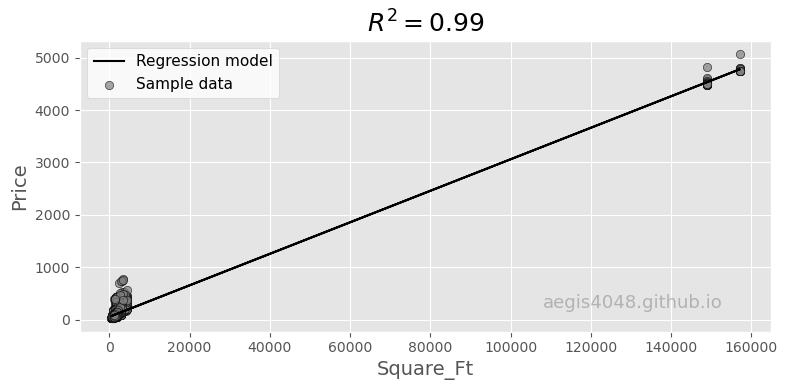

In [54]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X_sqft, response, color='k', label='Regression model')
ax.scatter(X_sqft, y_Price, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Price', fontsize=14)
ax.set_xlabel('Square_Ft', fontsize=14)
ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center', transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

# Multiple Linear Regression

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(29152, 16)
(7245, 16)
(29152,)
(7245,)


In [57]:
linreg = LinearRegression()
linreg

LinearRegression()

In [58]:
linreg.fit(X_train, y_train)

LinearRegression()

In [59]:
linreg.coef_

array([ 6.50267962e-01,  6.25374177e+00,  2.97923251e-02, -6.50267962e-01,
       -1.11594760e+01,  4.43143476e+00,  1.97633392e-02,  1.27778083e+01,
       -3.56035502e+00,  1.53881154e+00,  2.02154348e+00, -4.38445323e+00,
        7.52010723e+00, -3.13565400e+00,  1.46359072e+03, -2.09891964e+04])

In [60]:
linreg.intercept_

-37.25115844194593

In [61]:
y_pred = linreg.predict(X_test)
y_pred

array([ 95.24553194,  75.36825385,  66.48721982, ..., 122.99717028,
        78.46860492,  87.71835728])

In [62]:
comparison = pd.DataFrame(list(zip(y_test, y_pred)), columns = ['Actual', 'Predicted'])
comparison 

,Actual,Predicted
0,94.530,95.245532
1,68.065,75.368254
2,69.500,66.487220
3,62.500,69.648781
4,61.500,69.368236
...,...,...
7240,72.500,71.258334
7241,56.975,42.225290
7242,118.000,122.997170
7243,74.750,78.468605


In [63]:
from sklearn import metrics

In [64]:
# mean absolute
MA = metrics.mean_absolute_error(y_test, y_pred)
MA

7.741077328460555

In [65]:
# mean square
MS = metrics.mean_squared_error(y_test, y_pred)
MS

212.2694239424557

In [66]:
# root mean square
RMS = np.sqrt(MS)
RMS

14.569468897061954

In [67]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7245 entries, 21880 to 20750
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UNDER_CONSTRUCTION    7245 non-null   int64  
 1   No. of Bedrooms       7245 non-null   int64  
 2   SQUARE_FT             7245 non-null   float64
 3   READY_TO_MOVE         7245 non-null   int64  
 4   RESALE                7245 non-null   int64  
 5   availability          7245 non-null   int64  
 6   total_sqft            7245 non-null   float64
 7   balcony               7245 non-null   float64
 8   Builder               7245 non-null   uint8  
 9   Dealer                7245 non-null   uint8  
 10  Owner                 7245 non-null   uint8  
 11  Built-up  Area        7245 non-null   uint8  
 12  Plot  Area            7245 non-null   uint8  
 13  Super built-up  Area  7245 non-null   uint8  
 14  price_per_ft          7245 non-null   float64
 15  apartment_ratio 

In [68]:
# Set independent and dependent variables
X_independent = test_data[['SQUARE_FT', 'No. of Bedrooms', 'UNDER_CONSTRUCTION', 'READY_TO_MOVE', 'total_sqft', 'RESALE']]
y_dependent = test_data['PRICE']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model1 = regr.fit(X_independent, y_dependent)

print('Intercept:', model1.intercept_)
print('Coefficients:', model1.coef_)

Intercept: -54.446672647771294
Coefficients: [ 0.0299667   8.83255566  1.78776577 -1.78776577  0.05034672  9.03418242]


In [73]:
# Values to predict
sq_ft = input('What is the expected area of the house you are looking for? \n')
bedr = input('How many bedrooms are present? \n')
Under_Construction = input('Is the flat ready? (Type 1 for yes and 0 for No)\n')
Ready_To_Move = input('Is the apartment ready to move in? (Type 1 for yes and 0 for No) \n') 
tsq_ft = input('What is the total area of the apartment including the premises? \n')
resale = input('Is this flat available for resale? (Type 1 for yes and 0 for No)\n')

try:
    print('We predict the price of the apartment as Rs. {:.0f} Lacs'.format(model1.predict([[float(sq_ft), float(bedr), float(Under_Construction), float(Ready_To_Move), float(tsq_ft), float(resale)]])[0]))
except ValueError:
    print('Please only input either:\n- whole number e.g. 1, 4, 7\n- decimal/float number e.g. 3.8')

What is the expected area of the house you are looking for? 
1500.00
How many bedrooms are present? 
3
Is the flat ready? (Type 1 for yes and 0 for No)
1
Is the apartment ready to move in? (Type 1 for yes and 0 for No) 
0
What is the total area of the apartment including the premises? 
1750
Is this flat available for resale? (Type 1 for yes and 0 for No)
1
We predict the price of the apartment as Rs. 116 Lacs
